## Contexto y Descripción del Dataset

El **«Diabetes Dataset»** contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es _predecir si un paciente tiene diabetes o no_, basándose en ciertas medidas diagnósticas incluidas en el dataset.



### Requisitos

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 1. Limpieza de Datos:

- **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.


In [59]:
# cargar el dataset y ver la estructura
df = pd.read_csv("../data/diabetes.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**A simple vista no tenemos valores faltantes, seguimos buscando inconsistencias**

#### Diccionario de Datos:

- _Pregnancies:_ Número de embarazos.
- _Glucose:_ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- _BloodPressure:_ Presión arterial diastólica (mm Hg).
- _SkinThickness:_ Espesor del pliegue cutáneo del tríceps (mm).
- _Insulin:_ Niveles séricos de insulina a las 2 horas (mu U/ml).
- _BMI:_ Índice de masa corporal (peso en kg / (altura en m)^2).
- _DiabetesPedigreeFunction:_ Función de pedigrí de diabetes.
- _Age:_ Edad (años).
- _Outcome:_ Variable objetivo (1: diabetes, 0: no diabetes).

In [60]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [61]:
df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Pero enseguida notamos valores en 0**

In [63]:
# Convertir la columna Outcome a boolean
df['Outcome'] = df['Outcome'].astype('bool')

**Pasamos a tipo booleano Outcome por ser 0, 1 significando True or False**

In [64]:
pd.crosstab(df.Pregnancies,df.Outcome)

Outcome,False,True
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


**Aca hacemos una breve exploracion para ver cantidad de embarazos relacionados a la diabetes**

In [65]:
#Codigo para detectar outliers usando el IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return True for outliers
    return (data < lower_bound) | (data > upper_bound)

In [66]:
#Verificamos los tipos de variables numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Aca estamos buscando los outliers que probablemnte son los valores en 0

In [67]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Pregnancies,4.0,0.520833,0.000,13.000
Glucose,5.0,0.651042,44.000,199.000
BloodPressure,45.0,5.859375,38.000,106.000
SkinThickness,1.0,0.130208,0.000,63.000
Insulin,34.0,4.427083,0.000,318.000
BMI,19.0,2.473958,18.200,50.000
DiabetesPedigreeFunction,29.0,3.776042,0.078,1.191
Age,9.0,1.171875,21.000,66.000


In [68]:
# verificamos de nuevo con nuestros valores estadisticos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Encontramos que los valores que comienzan en 0 son:
- _Glucose:_ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- _BloodPressure:_ Presión arterial diastólica (mm Hg).
- _SkinThickness:_ Espesor del pliegue cutáneo del tríceps (mm).
- _Insulin:_ Niveles séricos de insulina a las 2 horas (mu U/ml).
- _BMI:_ Índice de masa corporal (peso en kg / (altura en m)^2).
#### Vemos que los lower bound de:
- Glucose 44
- BloodPressure 38
#### Y vemos que la media de los mismos son:
- Glucose 120
- BloodPressure 69

### Con una breve busqueda vemos que segun segun estudios son:
- Typically, **blood glucose** levels are tightly regulated between 70 and 150 mg dL− 1 in healthy man. [link](https://www.sciencedirect.com/topics/immunology-and-microbiology/glucose-blood-level)
- The new **blood pressure** classification of the US Clinical Practice Guidelines for High Blood Pressure45: Normal	<122 mmHg	and	<80 mmHg [link](https://academic.oup.com/eurheartj/article/39/24/2233/5035212)

### Tambien vemos sobre nuestros puntos.
- **SkinThickness** In girls, the 50th percentile ranged from 14.0 to 22.0 mm, 12.0 to 21.0 mm, and 28.0 to 42.0 mm, respectively. [link](https://pmc.ncbi.nlm.nih.gov/articles/PMC5083983/)
- **Insulin** Después de una prueba de tolerancia a la glucosa oral, los niveles de insulina a las 2 horas pueden variar ampliamente. En individuos sin resistencia a la insulina, los niveles suelen estar por debajo de 50 μU/ml. [link](https://medlineplus.gov/spanish/pruebas-de-laboratorio/insulina-en-la-sangre/?utm_source=chatgpt.com)
- **BMI** It should be understood that in Western population-basedstudies, generally the mean or median BMI is about 24 to 27. [link](https://www.researchgate.net/publication/276444598_Body_Mass_Index)

### **Con esos datos continuamos nuestro analisis.**

### Buscamos los valores nulos con estos datos.

In [69]:
# filtrar donde glucose sea 0
filt_vitals = df[(df['Glucose'] == 0)]
filt_vitals.count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [70]:
#filtramos donde BloodPressure sea 0
filt_blood = df[(df['BloodPressure'] == 0)]
filt_blood.count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [71]:
filt_glu= df[(df['SkinThickness'] == 0)]
filt_glu.count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

In [72]:
# filtrar donde insulin sea 0
filt_vitals = df[(df['Insulin'] == 0)]
filt_vitals.count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

In [73]:
# filtrar donde  bmi sea 0
full_filter = df[(df['BMI'] == 0)]
full_filter.count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

### Volvemos a ver los valores en na

In [74]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


### Identifica duplicados

In [75]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")


Número de registros duplicados: 0



#### 2. Exploración de Datos:

- **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


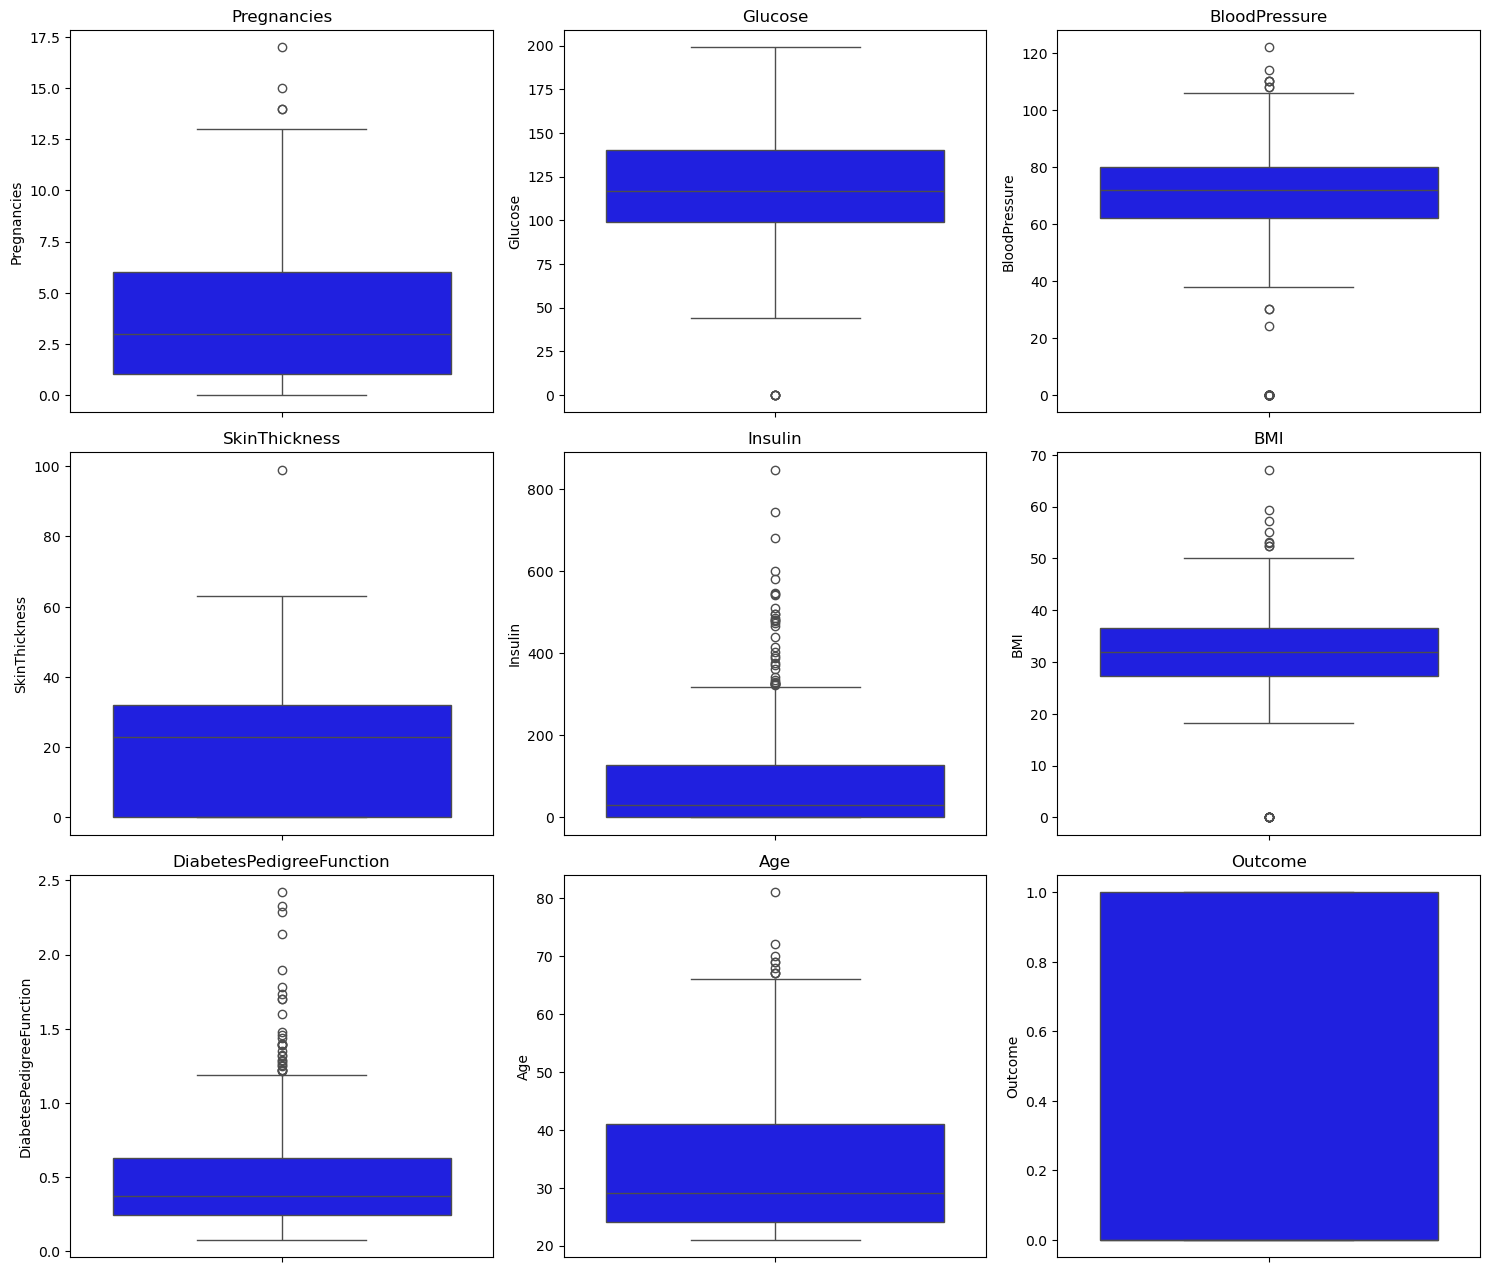

In [76]:
# Configurar el tamaño de la figura 
plt.figure(figsize=(15, 17)) 
# Crear un boxplot para cada variable en el DataFrame 
for i, column in enumerate(df.columns, 1): 
    plt.subplot(len(df.columns)//3 + 1, 3, i) 
    sns.boxplot(data=df[column], orient="v", color="blue") 
    plt.title(column) 
# Ajustar el layout para que los plots no se sobrepongan 
plt.tight_layout() 
# Mostrar los plots 
plt.show()

### **Resumen de los graficos**

1. **Pregnancies**: La mayoría de los valores están por debajo de 10, con algunos valores atípicos por encima de 15.  
2. **Glucose**: Los valores están centrados entre 100 y 150, con algunos valores atípicos bajos y altos.  
3. **BloodPressure**: La mayoría de los valores están entre 60 y 90, con algunos valores atípicos en ambos extremos.  
4. **SkinThickness**: Los valores se concentran por debajo de 40, con algunos valores atípicos altos.  
5. **Insulin**: Está altamente sesgado, con varios valores atípicos extremos por encima de 300.  
6. **BMI**: La mayoría de los valores están entre 20 y 40, con algunos valores atípicos bajos y altos.  
7. **DiabetesPedigreeFunction**: La mayoría de los valores están por debajo de 1, pero hay algunos valores atípicos por encima de 2.  
8. **Age**: La mayoría de las personas tienen entre 20 y 50 años, con menos valores por encima de 60.  
9. **Outcome**: Variable binaria (0 o 1), representada como categórica en esta visualización.

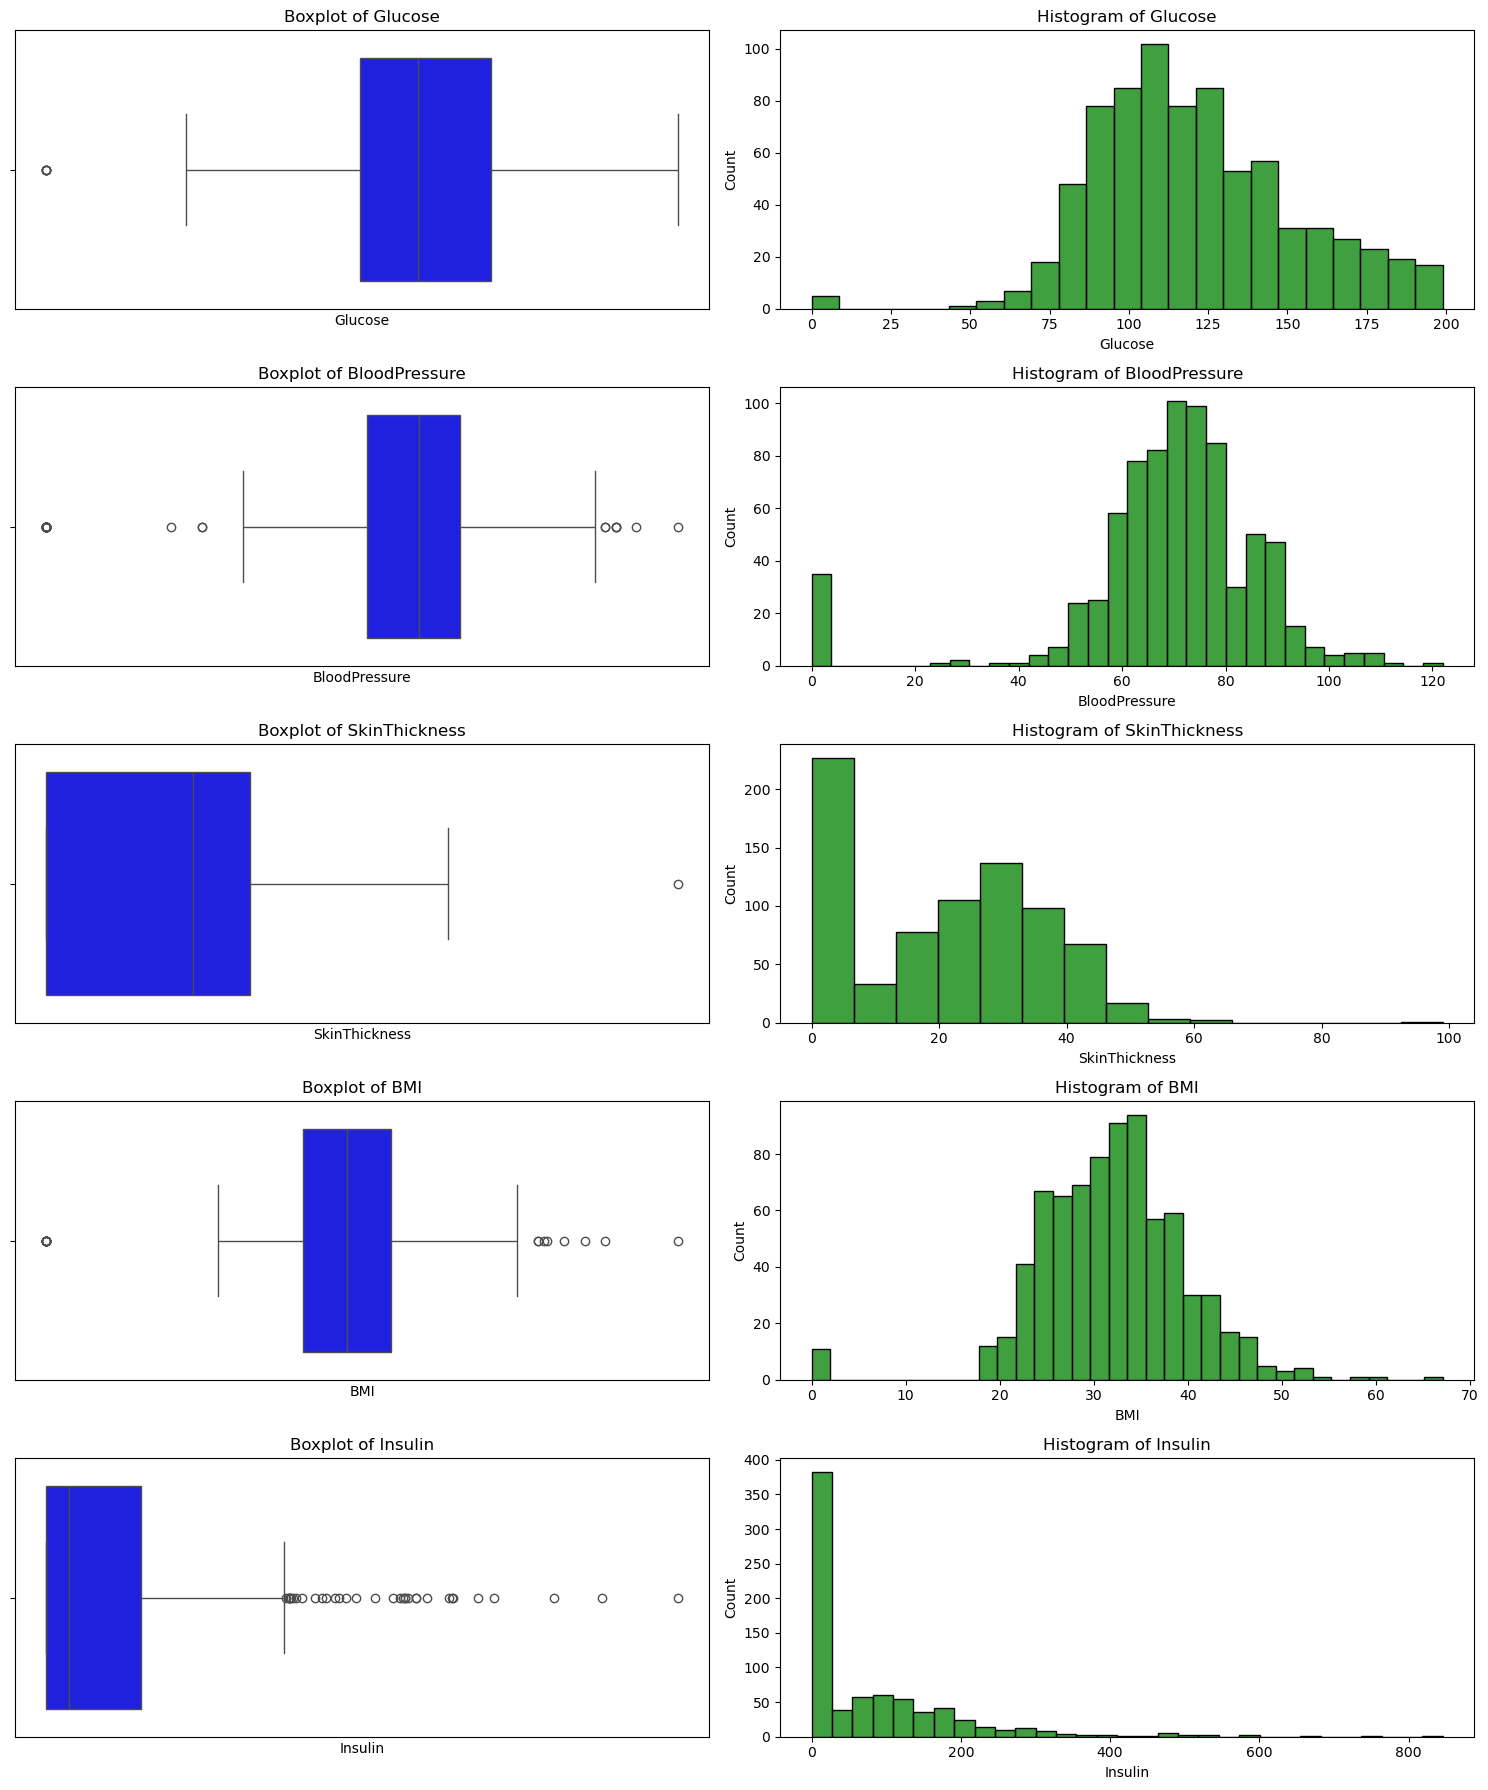

In [77]:
# Lista de variables
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

# Configurar la figura con subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18), gridspec_kw={"height_ratios": [1, 1, 1, 1, 1], "width_ratios": [4, 4]})

# Iterar sobre cada variable y crear los gráficos
for i, var in enumerate(variables):
    sns.boxplot(x=df[var], ax=axes[i, 0], color='blue')
    axes[i, 0].set(title=f'Boxplot of {var}', xticks=[])

    sns.histplot(df[var], bins='auto', kde=False, ax=axes[i, 1], color='green')
    axes[i, 1].set(title=f'Histogram of {var}', xlabel=var)

# Ajustar el layout para que los plots no se sobrepongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()



### **Resumen de los graficos**
- Visualizamos nuestros valores outliers  y como afectan a nuestros graficos y podrian afectar a nuestro modelo.

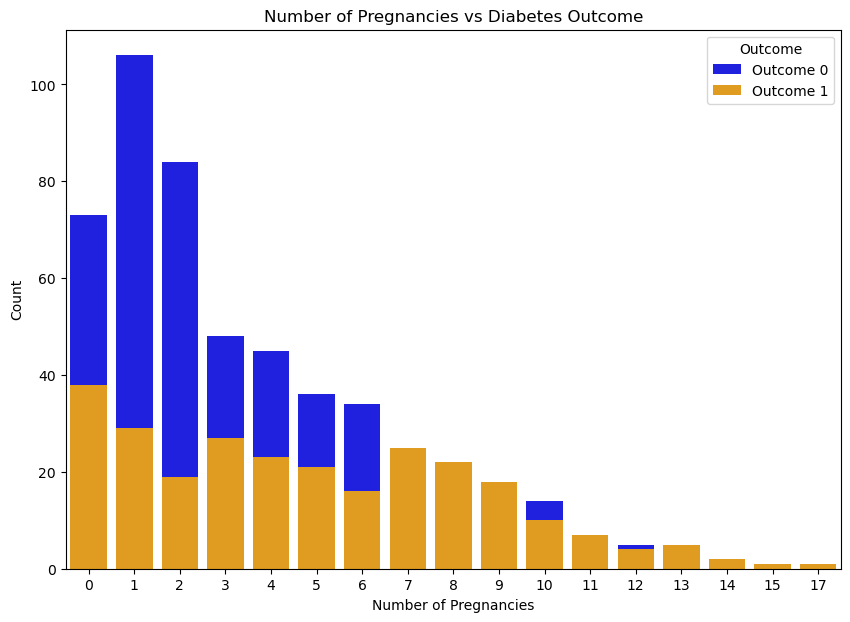

In [78]:
# Crear una tabla cruzada
crosstab = pd.crosstab(df.Pregnancies, df.Outcome)

# Resetear el índice para facilitar el uso con Seaborn
crosstab = crosstab.reset_index()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 7))

# Crear un gráfico de barras usando Seaborn
sns.barplot(x='Pregnancies', y=0, data=crosstab, label='Outcome 0', color='blue')
sns.barplot(x='Pregnancies', y=1, data=crosstab, label='Outcome 1', color='orange')

# Añadir etiquetas y título
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Number of Pregnancies vs Diabetes Outcome')
plt.legend(title='Outcome')

# Mostrar el gráfico
plt.show()


### Este gráfico muestra la relación entre el número de embarazos y el resultado de diabetes (Outcome). Observaciones clave:  

1. **Outcome 0 (azul)** es más frecuente para mujeres con menos embarazos, especialmente en valores como 0, 1, y 2.  
2. **Outcome 1 (naranja)** tiende a aumentar proporcionalmente a medida que el número de embarazos crece, especialmente desde 3 en adelante.  
3. Las mujeres con más de 10 embarazos tienen una mayor proporción relativa de diabetes (Outcome 1) en comparación con Outcome 0.  

Esto sugiere una posible correlación entre el número de embarazos y el riesgo de diabetes.

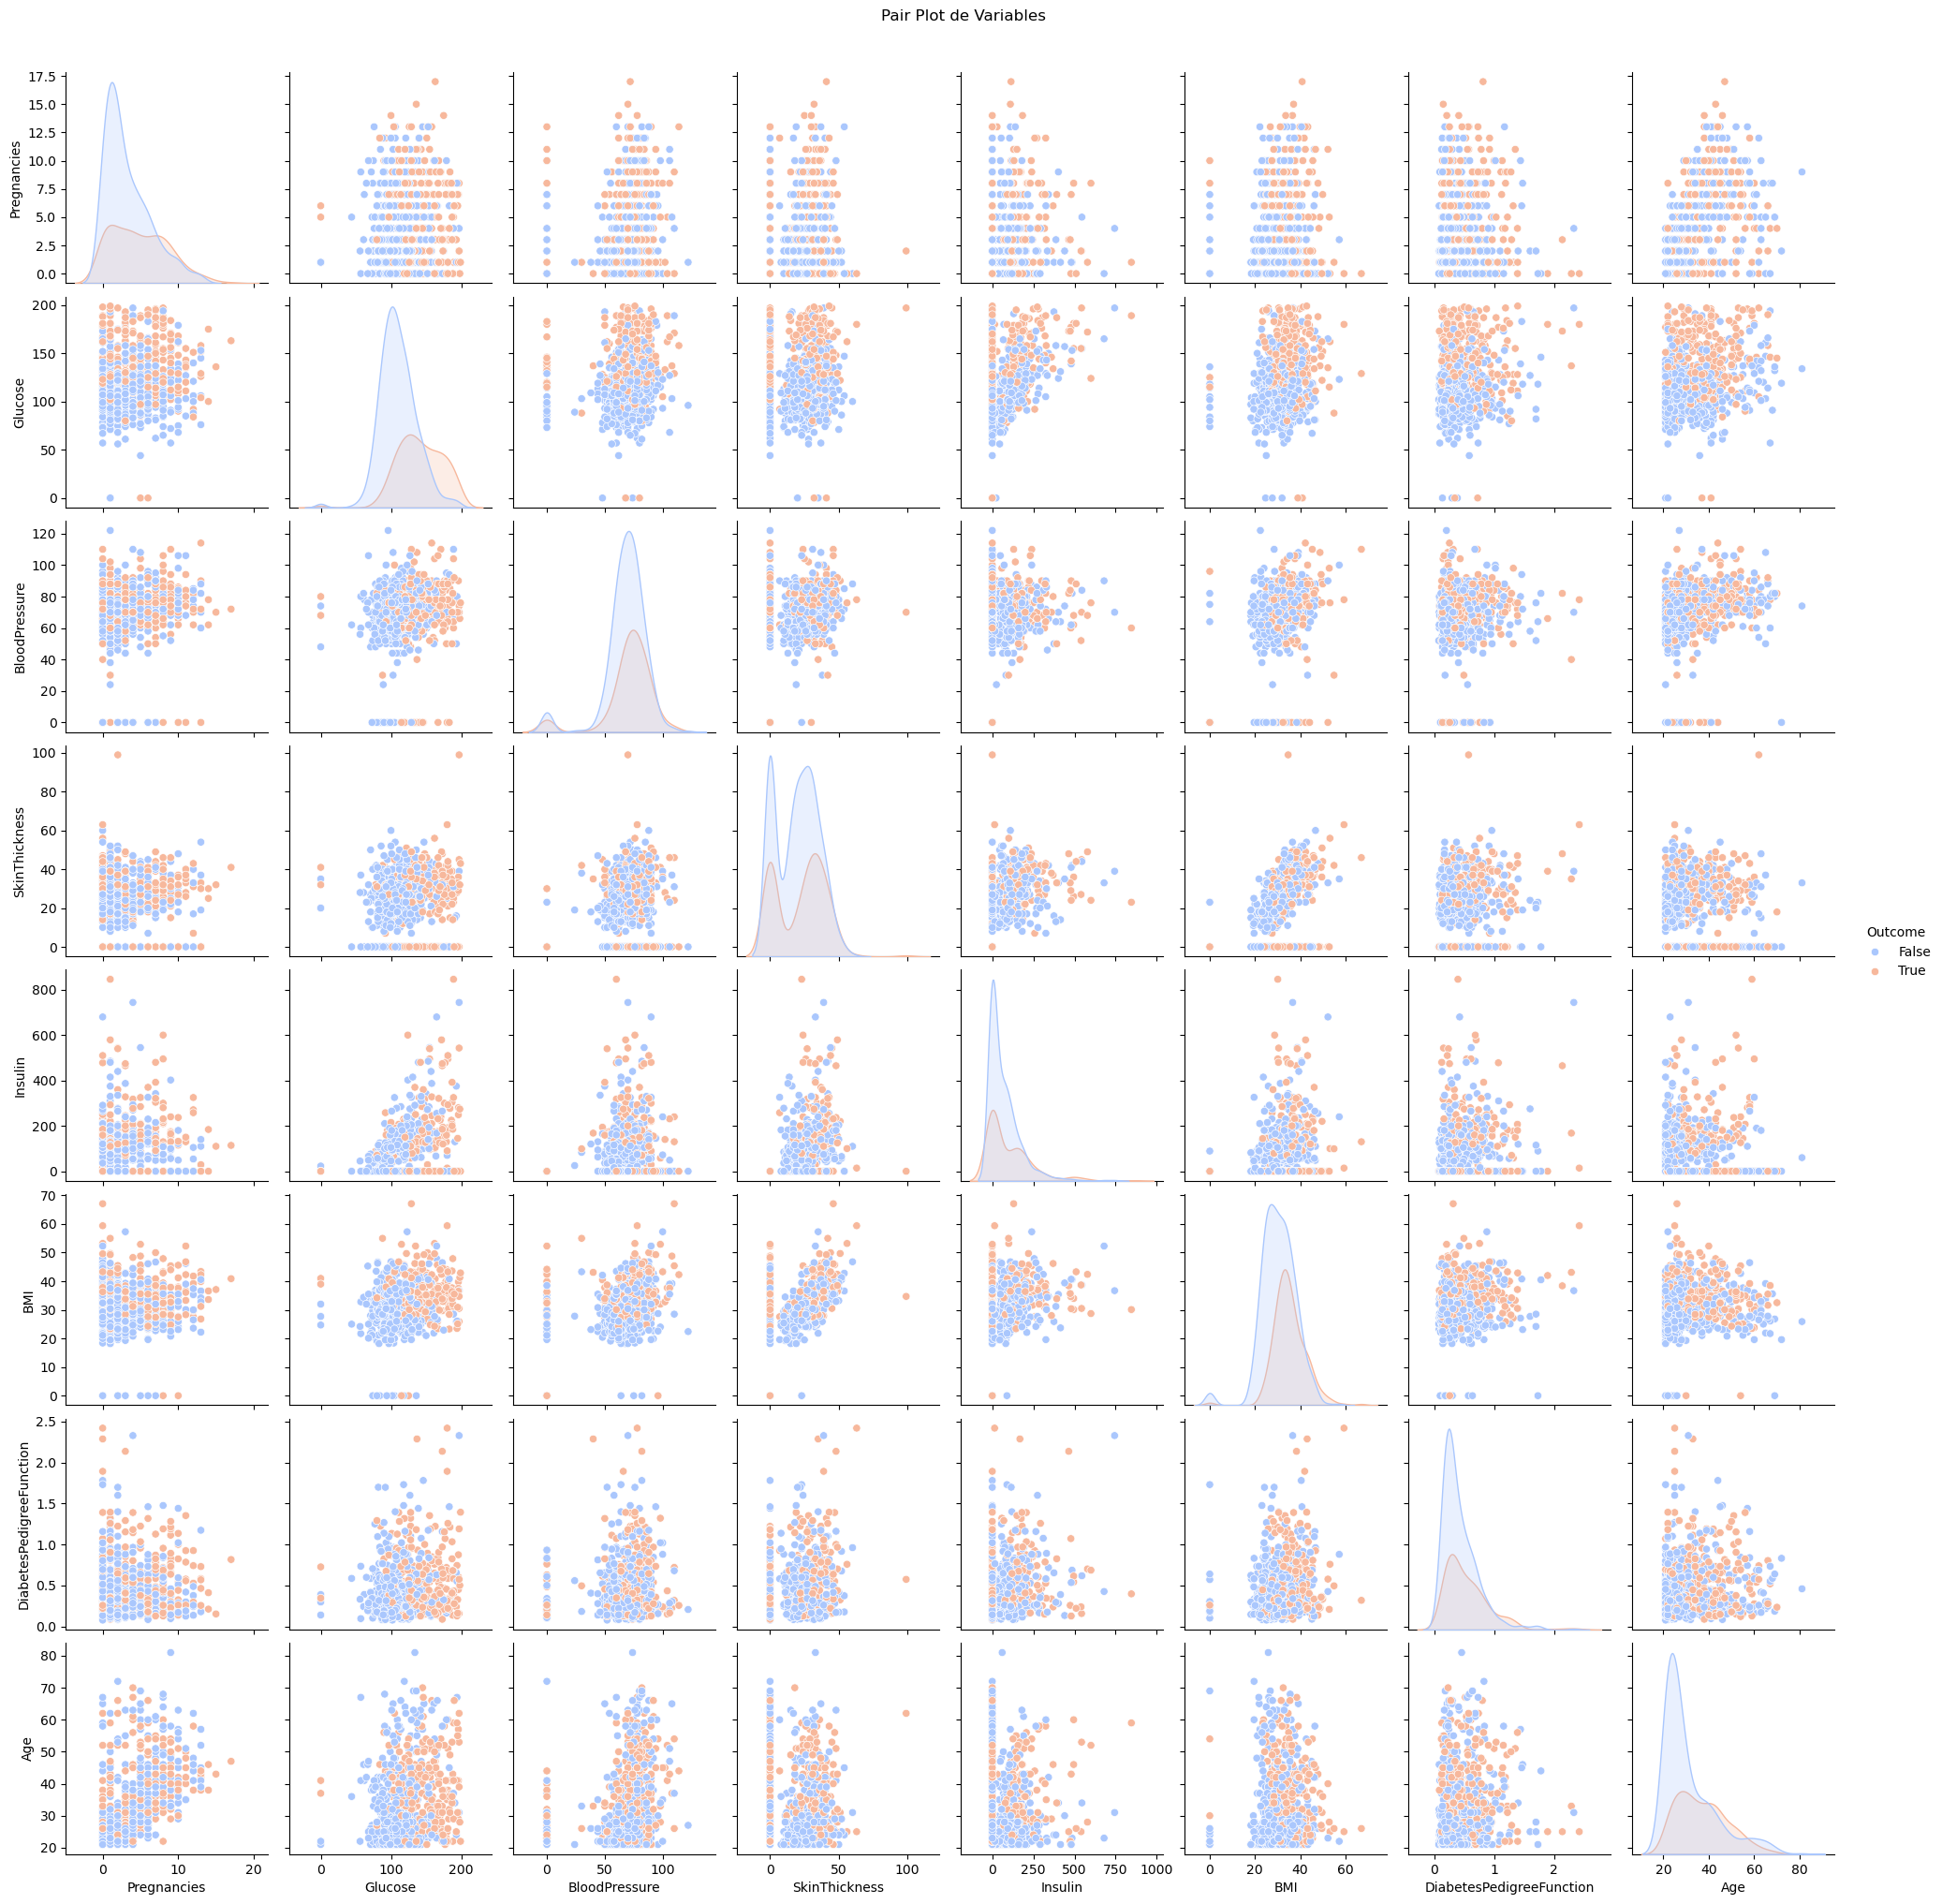

In [79]:
sns.pairplot(df, hue='Outcome', palette='coolwarm')
plt.suptitle('Pair Plot de Variables', y=1.02)
plt.show()


### **Resumen del grafico.**
- Este pairplot proporciona una visión completa de cómo las diferentes variables interactúan entre sí y con el resultado de diabetes. 
- Las variables _Glucose, BMI, Insulin, y DiabetesPedigreeFunction_ muestran claras asociaciones con el Outcome de diabetes, lo que puede ser crucial para el modelado predictivo y la evaluación de factores de riesgo.

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

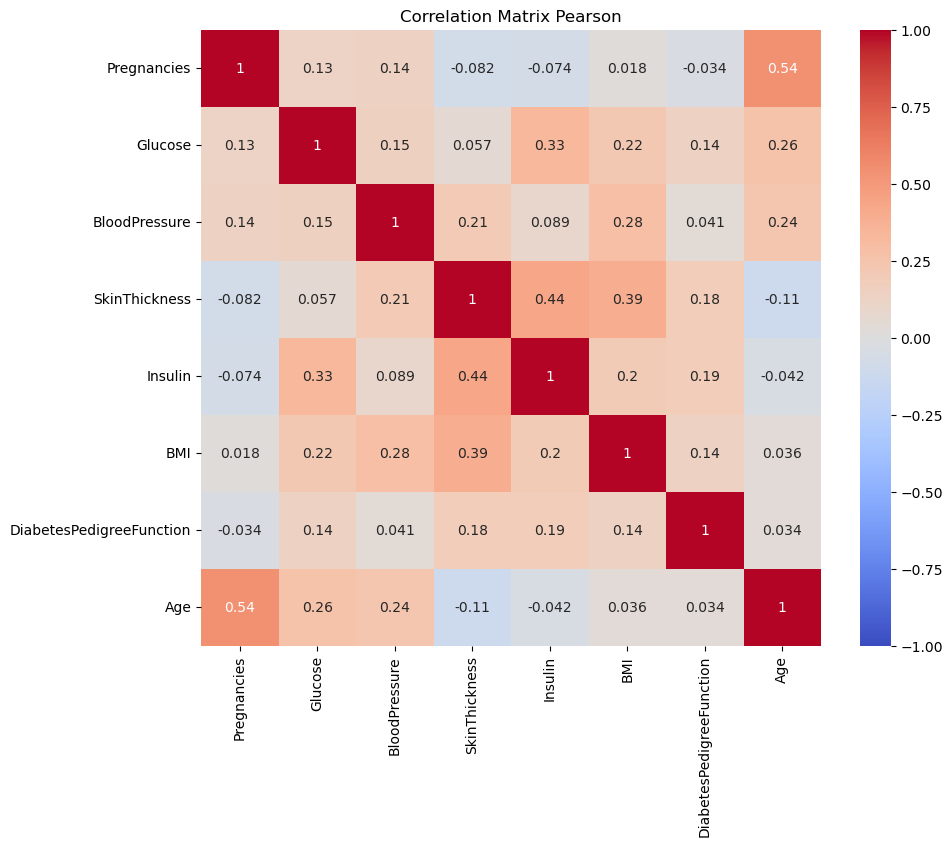

In [80]:
# Correlation for numeric features
print(df[numerical_columns].describe())

# calculate correlation with numerical_features
corr_matrix = df[numerical_columns].corr(method='pearson')

# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Pearson")
plt.show()

### **Comparación con el Pair Plot:**
- **Glucose y Outcome:** En el pair plot, se observó una clara tendencia donde mayores niveles de glucosa están asociados con pacientes que tienen diabetes. La correlación de Pearson también muestra una relación positiva, aunque no tan fuerte. Esto confirma que la glucosa es un factor importante.

- **BMI y Outcome:** Similarmente, tanto el pair plot como la matriz de correlación muestran una relación con Outcome, donde mayores niveles de BMI están asociados con diabetes.

- **Insulin y Glucose:** La correlación entre insulina y glucosa es moderada en ambos gráficos, lo que sugiere una relación consistente entre estos dos factores.

- **Distribución y Dispersión:** En el pair plot, variables como Pregnancies mostraban una distribución dispersa. La matriz de correlación muestra una correlación moderada con Age, sugiriendo que la edad puede influir en la cantidad de embarazos.

### **Conclusión:**
El mapa de calor de la correlación de Pearson proporciona una visión complementaria al pair plot, confirmando varias de las relaciones observadas visualmente y destacando las conexiones más significativas entre variables clave como Glucose, Insulin, y BMI. Estos insights son cruciales para comprender mejor la dinámica entre estas variables y su relación con la diabetes.

## Por estos resultados decicidimos hacemos modificaciones en el dataset para continuar a preparar los datos para el modelo de ML.

In [81]:
# Copiar el DataFrame original para crear un nuevo DataFrame
df_train = df.copy()

# Reemplazar 0 por NaN en las columnas especificadas
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df_train[columns_to_replace] = df_train[columns_to_replace].replace(0, np.nan)

# Aplicar condición en la columna Insulin
df_train.loc[(df_train['Insulin'] < 1) & (df_train['Outcome'] == False), 'Insulin'] = np.nan

# Verificar los cambios en el nuevo DataFrame
df_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,True
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,False
2,8,183.0,64.0,NaN,0.0,23.3,0.672,32,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,True


- Primero reemplazar 0 por NaN en las columnas especificadas 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'.
- Y luego aplicamos la condicion en insulin de reemplazar los 0 en Insulin **donde NO sean positivos de diabetes**.

In [82]:
# hacer un filtro de los valores nulos en insulin
filtro = df_train[df_train['Insulin'].isnull()]['Glucose']
filtro.describe()

count    234.000000
mean     109.730769
std       24.997171
min       44.000000
25%       92.000000
50%      107.000000
75%      123.750000
max      194.000000
Name: Glucose, dtype: float64

Vemos nuestros nuevos valores en insulin luego del filtro

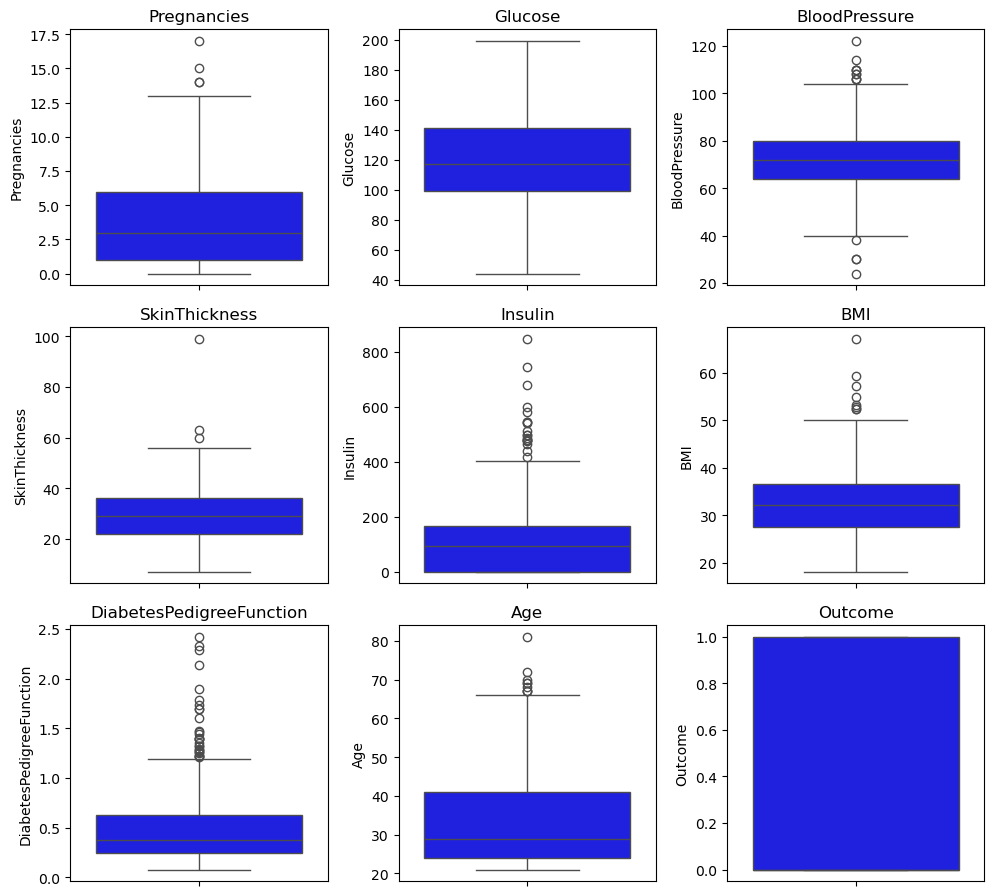

In [83]:
# Configurar el tamaño de la figura 
plt.figure(figsize=(10, 12)) 
# Crear un boxplot para cada variable en el DataFrame 
for i, column in enumerate(df_train.columns, 1): 
    plt.subplot(len(df_train.columns)//3 + 1, 3, i) 
    sns.boxplot(data=df_train[column], orient="v", color="blue") 
    plt.title(column) 
# Ajustar el layout para que los plots no se sobrepongan 
plt.tight_layout() 
# Mostrar los plots 
plt.show()

### Resumen del grafico.
- Visualizamos que los valores outliers en valores importantes fueron de gran ayuda para regular nuestros datos.

In [84]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,532.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,115.199248,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,122.874815,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,91.500000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,165.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Volvemos a revisar nuestros valores estadisticos antes de incluir en el modelo

In [85]:
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Insulin,532,236,30.73
SkinThickness,541,227,29.56
BloodPressure,733,35,4.56
BMI,757,11,1.43
Glucose,763,5,0.65
Pregnancies,768,0,0.00
DiabetesPedigreeFunction,768,0,0.00
Age,768,0,0.00
Outcome,768,0,0.00


### Verficamos que los 0 realmente hayan quedado nulos para imputar en nuestro preprocesamiento


#### 3. Implementación de Modelos:
 
- **Modelos de Clasificación:** Implementa modelos de Random Forest y XGBoost.
- **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


In [86]:
# Prepare the data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb


X = df_train.drop('Outcome', axis=1)
y = df_train['Outcome']


# Define the preprocessing pipeline
preprocess = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Apply the pipeline to the features
X_preprocessed = preprocess.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)[:, 1]

# Train and evaluate XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics for both models
metrics = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, rf_pred), accuracy_score(y_test, xgb_pred)],
    'Precision': [precision_score(y_test, rf_pred), precision_score(y_test, xgb_pred)],
    'Recall': [recall_score(y_test, rf_pred), recall_score(y_test, xgb_pred)],
    'F1-Score': [f1_score(y_test, rf_pred), f1_score(y_test, xgb_pred)],
    'ROC-AUC': [roc_auc_score(y_test, rf_pred_proba), roc_auc_score(y_test, xgb_pred_proba)]
})

print("Model Performance Comparison:")
metrics.round(3)

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.883,0.863,0.800,0.830,0.926
1,XGBoost,0.864,0.827,0.782,0.804,0.932


### **Discusion sobre resultados del performance.**
- **RandomForestClassifier** parece ser más adecuado en términos de precisión, precisión, recall y F1-Score. Estas métricas son cruciales dependiendo del contexto de uso. Si el objetivo es maximizar la cantidad de verdaderos positivos y reducir los falsos positivos en general, Random Forest es la mejor opción.

- **XGBoost**, por otro lado, presenta un ROC-AUC ligeramente superior, lo que indica que podría tener mejor capacidad para distinguir entre las clases en un conjunto de datos no balanceado o en la evaluación de modelos de discriminación.

In [87]:
# Preparamos el ambiente para AdaBoost
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Suprimir advertencias específicas de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Configuración del modelo base y AdaBoost
base_model = DecisionTreeClassifier(max_depth=2)  # Árbol con profundidad limitada
ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=10,
    learning_rate=0.5,
    algorithm="SAMME",  # Cambiar a SAMME
    random_state=42
)

# Entrenar el modelo de AdaBoost
ada_model.fit(X_train, y_train)

# Obtener los pesos y errores de los weak learners
estimator_weights = ada_model.estimator_weights_
estimator_errors = ada_model.estimator_errors_

# Crear un DataFrame para mostrar los pesos y errores de los weak learners
estimator_data = {
    "Estimator Index": list(range(1, len(estimator_weights) + 1)),
    "Estimator Weight": estimator_weights,
    "Estimator Error": estimator_errors,
}
estimator_df = pd.DataFrame(estimator_data)

# Mostrar los resultados en la consola
print("Pesos y errores de los weak learners:")
estimator_df

Pesos y errores de los weak learners:


,Estimator Index,Estimator Weight,Estimator Error
0,1,0.806676,0.166124
1,2,0.727478,0.189240
2,3,0.661147,0.210437
3,4,0.313572,0.348158
4,5,0.463219,0.283648
5,6,0.309153,0.350167
6,7,0.332309,0.339703
7,8,0.420184,0.301457
8,9,0.423815,0.299930
9,10,0.250269,0.377414


### Parámetros del Modelo Base:

- **max_depth=2:** Fuerza árboles muy simples que aprenden rápida y específicamente.
- **min_samples_leaf=5:** Asegura que cada predicción se base en al menos 5 muestras.
- **min_samples_split=10:** Solo divide nodos con un soporte de datos sustancial.


Mean CV Score: 0.8844 (+/- 0.0577)


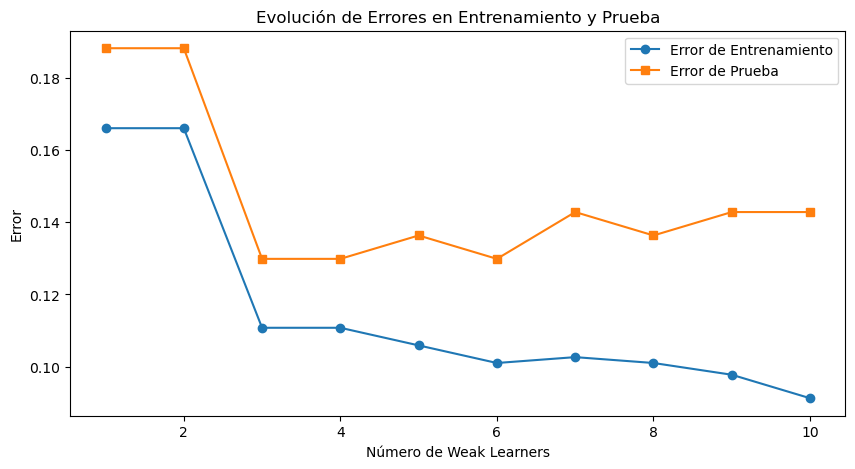

   Estimator Index  Estimator Weight  Estimator Error
0                1          0.806676         0.166124
1                2          0.727478         0.189240
2                3          0.661147         0.210437
3                4          0.313572         0.348158
4                5          0.463219         0.283648
5                6          0.309153         0.350167
6                7          0.332309         0.339703
7                8          0.420184         0.301457
8                9          0.423815         0.299930
9               10          0.250269         0.377414


In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ada_model, X_train, y_train, cv=5)
print(f"Mean CV Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Obtener los errores en cada iteración
train_errors = []
test_errors = []

for train_pred, test_pred in zip(ada_model.staged_predict(X_train), ada_model.staged_predict(X_test)):
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Graficar errores de entrenamiento y prueba
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_errors) + 1), train_errors, marker="o", label="Error de Entrenamiento")
plt.plot(range(1, len(test_errors) + 1), test_errors, marker="s", label="Error de Prueba")
plt.xlabel("Número de Weak Learners")
plt.ylabel("Error")
plt.title("Evolución de Errores en Entrenamiento y Prueba")
plt.legend()
plt.show()

# Mostrar pesos y errores como antes
estimator_weights = ada_model.estimator_weights_
estimator_errors = ada_model.estimator_errors_

estimator_data = {
    "Estimator Index": list(range(1, len(estimator_weights) + 1)),
    "Estimator Weight": estimator_weights,
    "Estimator Error": estimator_errors,
}
estimator_df = pd.DataFrame(estimator_data)
print(estimator_df)

### Puntuación Media de Validación Cruzada: 0.8844 (88.44%)

- Este es un puntaje de precisión sólido, lo que indica que el modelo clasifica correctamente alrededor del 88% de los casos.

- El modelo de clasificación está funcionando bastante bien. Es preciso y consistente en sus predicciones.


#### Entrega

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.
- Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

#### Consideraciones Éticas y Tecnológicas

#### Consideraciones Éticas:

- Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
- Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

#### Consideraciones Tecnológicas:

- Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
- Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
- Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.